# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
#Test print random city to see what structure of json is
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Beijing"
city_url = url + "appid=" + weather_api_key + "&q=" + city
city_weather = requests.get(city_url).json()
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 39.9075, 'lon': 116.3972},
 'dt': 1714958422,
 'id': 1816670,
 'main': {'feels_like': 293.08,
          'grnd_level': 1007,
          'humidity': 32,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 294.09,
          'temp_max': 294.09,
          'temp_min': 294.09},
 'name': 'Beijing',
 'sys': {'country': 'CN',
         'id': 9609,
         'sunrise': 1714943322,
         'sunset': 1714993999,
         'type': 1},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 25, 'gust': 3.71, 'speed': 2.46}}


In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = 'metric'
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mananara
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | ad dabbah
Processing Record 9 of Set 1 | afaahiti
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | ahau
City not found. Skipping...
Processing Record 12 of Set 1 | menaka
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | saipan
Processing Record 15 of Set 1 | tazovsky
Processing Record 16 of Set 1 | antsiranana
Processing Record 17 of Set 1 | aripuana
Processing Record 18 of Set 1 | severobaykal'sk
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | trinity beach
Processing Record 21 of Set 1 | sovetskiy
Processing Record 22 o

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mananara,-16.1667,49.7667,22.75,92,29,3.26,MG,1714958558
1,puerto ayora,-0.7393,-90.3518,23.64,96,97,2.24,EC,1714958559
2,jamestown,42.0970,-79.2353,17.23,96,100,2.57,US,1714958420
3,yellowknife,62.4560,-114.3525,14.67,54,20,5.14,CA,1714958413
4,tura,25.5198,90.2201,22.51,83,63,0.90,IN,1714958559


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mananara,-16.1667,49.7667,22.75,92,29,3.26,MG,1714958558
1,puerto ayora,-0.7393,-90.3518,23.64,96,97,2.24,EC,1714958559
2,jamestown,42.0970,-79.2353,17.23,96,100,2.57,US,1714958420
3,yellowknife,62.4560,-114.3525,14.67,54,20,5.14,CA,1714958413
4,tura,25.5198,90.2201,22.51,83,63,0.90,IN,1714958559


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

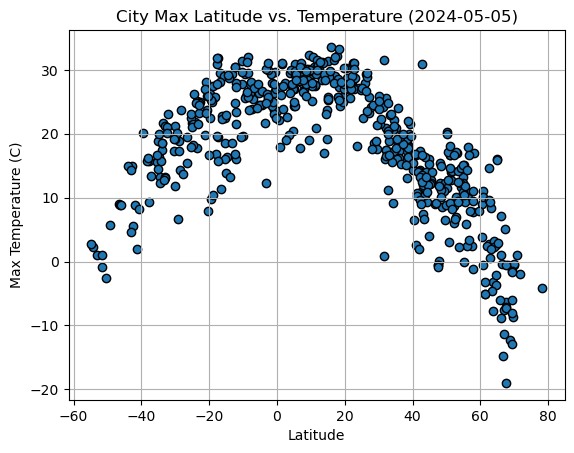

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolors='black' )

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-05-05)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

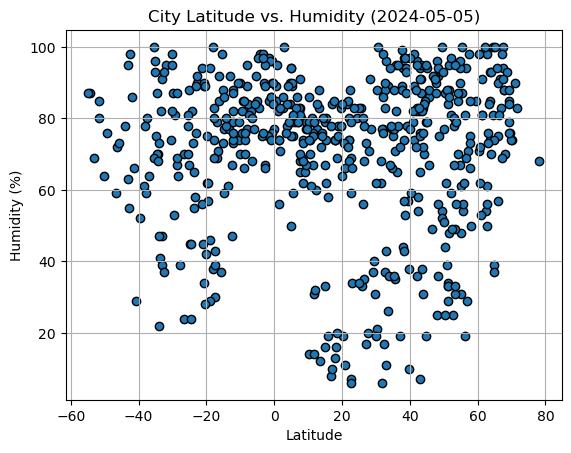

In [13]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors='black' )

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-05-05)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

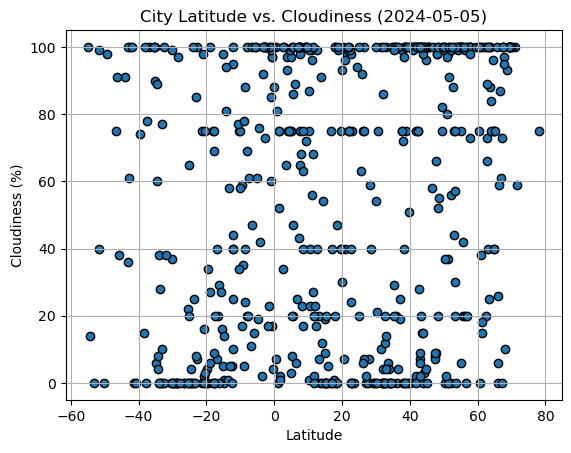

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors='black' )

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-05-05)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

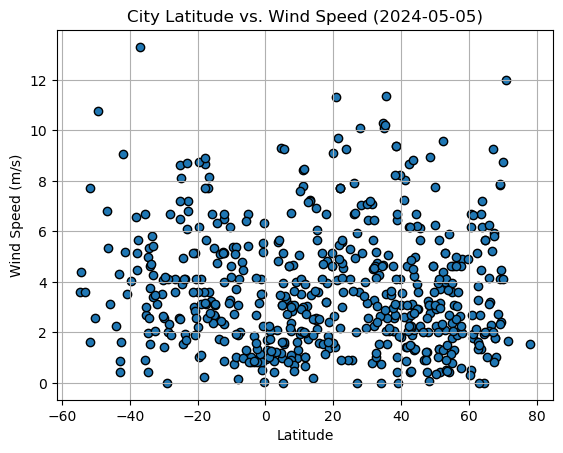

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors='black' )

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-05-05)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots

def create_linear_regression_plot(x, y, x_label, y_label):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    fit = slope * x + intercept

    plt.scatter(x, y, color = 'blue',alpha=.1)
    plt.plot(x, fit, color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (x.min(), y.min()), fontsize=15, color="red")
    print(f'The r-value is {r_value}')




In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,jamestown,42.0970,-79.2353,17.23,96,100,2.57,US,1714958420
3,yellowknife,62.4560,-114.3525,14.67,54,20,5.14,CA,1714958413
4,tura,25.5198,90.2201,22.51,83,63,0.90,IN,1714958559
5,thompson,55.7435,-97.8558,11.09,54,20,3.09,CA,1714958559
7,ad dabbah,18.0500,30.9500,28.27,13,0,3.94,SD,1714958560


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mananara,-16.1667,49.7667,22.75,92,29,3.26,MG,1714958558
1,puerto ayora,-0.7393,-90.3518,23.64,96,97,2.24,EC,1714958559
6,port-aux-francais,-49.3500,70.2167,5.73,76,98,10.76,TF,1714958559
8,afaahiti,-17.7500,-149.2833,30.93,83,69,8.69,PF,1714958560
11,new norfolk,-42.7826,147.0587,14.95,55,61,0.86,AU,1714958561


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8641364772272226


Text(0, 0.5, 'Max Temp')

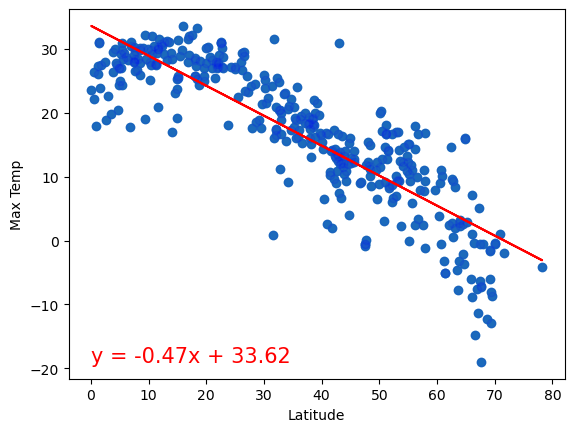

In [19]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

plt.scatter(x, y)
create_linear_regression_plot(x, y, x_label="Latitude", y_label="Max Temp")
plt.xlabel("Latitude")
plt.ylabel('Max Temp')



The r-value is 0.7998946611688479


Text(0, 0.5, 'Max Temp')

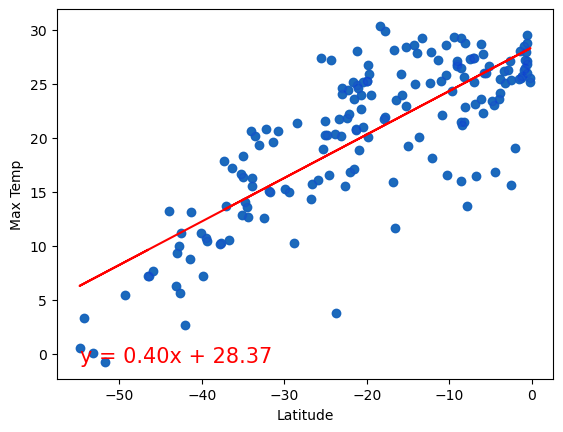

In [62]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

plt.scatter(x, y)
create_linear_regression_plot(x, y, x_label="Latitude", y_label="Max Temp")
plt.xlabel("Latitude")
plt.ylabel('Max Temp')

**Discussion about the linear relationship:
In both hemispheres the latitude and max temp seems to be correlated relatively strong. The difference is the northern has a negative correlation while southern has a positive

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.07777183898169647


Text(0, 0.5, 'Humidity')

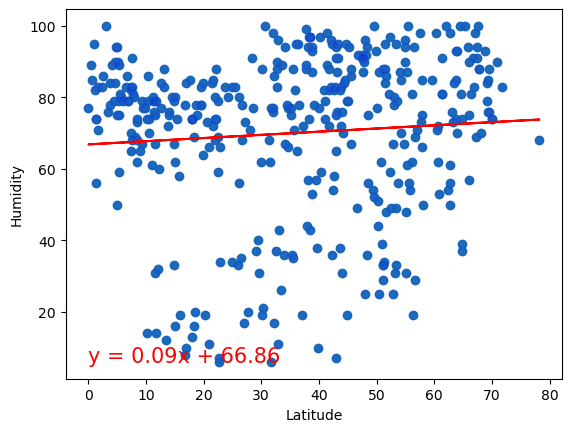

In [20]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

plt.scatter(x, y)
create_linear_regression_plot(x, y, x_label="Latitude", y_label="Max Temp")
plt.xlabel("Latitude")
plt.ylabel('Humidity')

The r-value is 0.1984168697056471


Text(0, 0.5, 'Humidity')

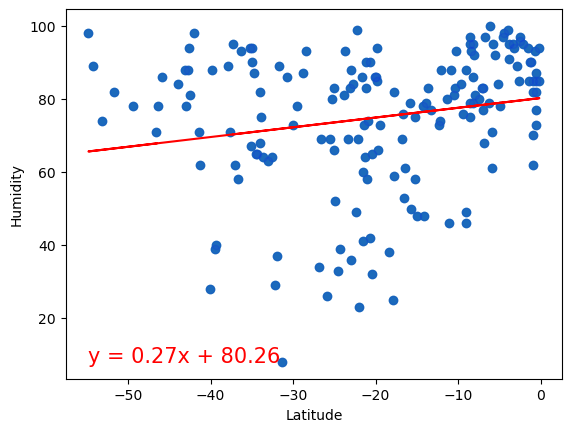

In [64]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

plt.scatter(x, y)
create_linear_regression_plot(x, y, x_label="Latitude", y_label="Max Temp")
plt.xlabel("Latitude")
plt.ylabel('Humidity')

**Discussion about the linear relationship:** The latitude and Humidity levels have a weak correlation with each other and have little relation with each other.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.17813166803876698


Text(0, 0.5, 'Cloudiness')

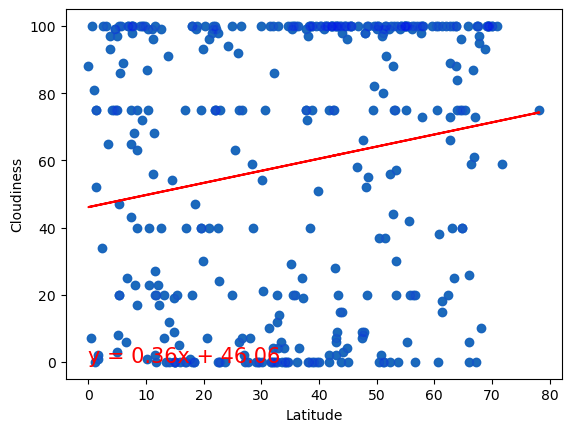

In [21]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

plt.scatter(x, y)
create_linear_regression_plot(x, y, x_label="Latitude", y_label="Max Temp")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')

The r-value is 0.19817962443873804


Text(0, 0.5, 'Cloudiness')

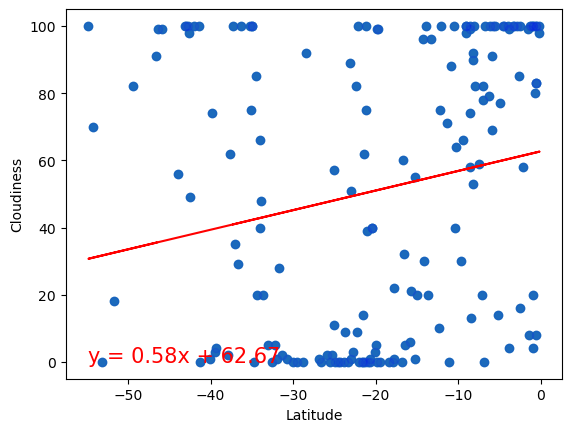

In [66]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

plt.scatter(x, y)
create_linear_regression_plot(x, y, x_label="Latitude", y_label="Max Temp")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** Latitude and cloudiness also do not have much of a linear relationship as they are very weakly correlated with each other.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.010982398564141342


Text(0, 0.5, 'Wind Speed')

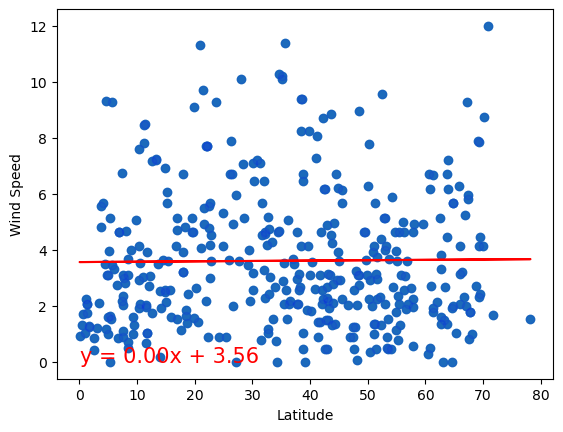

In [22]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

plt.scatter(x, y)
create_linear_regression_plot(x, y, x_label="Latitude", y_label="Max Temp")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed')

The r-value is -0.19604693155442163


Text(0, 0.5, 'Wind Speed')

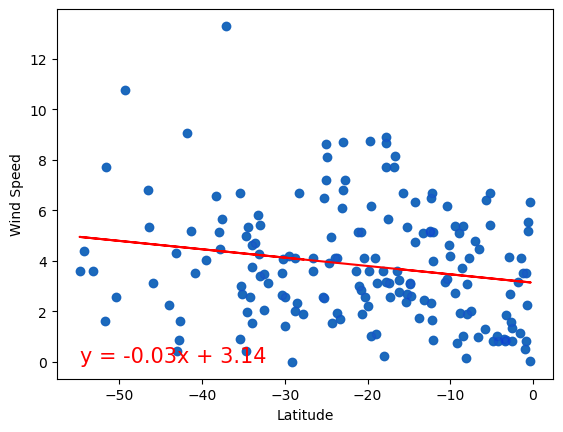

In [23]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

plt.scatter(x, y)
create_linear_regression_plot(x, y, x_label="Latitude", y_label="Max Temp")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** Latitude and Wind Speed also have a very weak correlation with each other, and don't have much of a linear relationship. However, it has more of a relationship with each other in the Southern Hemisphere versus the Northern Hemisphere